In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [68]:
binary = pd.CategoricalDtype(categories=[0, 1])
df = pd.read_csv(
    'processed.cleveland.data',
    header=None,
    na_values='?',
    names='age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target'.split(', '),
    dtype={
        'sex':binary,
        'cp':pd.CategoricalDtype(categories=range(1,5)),
        'fbs':binary,
        'restecg':pd.CategoricalDtype(categories=range(3)),
        'exang':binary,
        'slope':pd.CategoricalDtype(categories=range(1,4)),
        'ca':pd.CategoricalDtype(categories=range(4)),
        'thal':pd.CategoricalDtype(categories=[3,6,7]),
        'target':pd.CategoricalDtype(categories=range(2), ordered=True),
    }
)

In [69]:
data.target.value_counts()

0    164
1    139
Name: target, dtype: int64

In [70]:
data = data.fillna({'ca':0, 'thal':3, 'target':1})
data.target.value_counts()

0    164
1    139
Name: target, dtype: int64

In [71]:
mas = data.dtypes == 'category'
data.columns[mas][:-1]

Index([], dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        303 non-null    float64 
 1   trestbps   303 non-null    float64 
 2   chol       303 non-null    float64 
 3   thalach    303 non-null    float64 
 4   oldpeak    303 non-null    float64 
 5   target     303 non-null    category
 6   sex_0      303 non-null    uint8   
 7   sex_1      303 non-null    uint8   
 8   cp_1       303 non-null    uint8   
 9   cp_2       303 non-null    uint8   
 10  cp_3       303 non-null    uint8   
 11  cp_4       303 non-null    uint8   
 12  fbs_0      303 non-null    uint8   
 13  fbs_1      303 non-null    uint8   
 14  restecg_0  303 non-null    uint8   
 15  restecg_1  303 non-null    uint8   
 16  restecg_2  303 non-null    uint8   
 17  exang_0    303 non-null    uint8   
 18  exang_1    303 non-null    uint8   
 19  slope_1    303 non-null    ui

In [73]:
data.isnull().sum()

age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
target       0
sex_0        0
sex_1        0
cp_1         0
cp_2         0
cp_3         0
cp_4         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_1      0
slope_2      0
slope_3      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
thal_3       0
thal_6       0
thal_7       0
dtype: int64

In [74]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.320132,0.679868,0.075908,0.165017,0.283828,...,0.468647,0.462046,0.069307,0.594059,0.214521,0.125413,0.066007,0.554455,0.059406,0.386139
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.467299,0.467299,0.265288,0.371809,0.451600,...,0.499842,0.499382,0.254395,0.491886,0.411169,0.331734,0.248704,0.497848,0.236774,0.487668
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0.98, 'Pairplot: Numerical Features ')

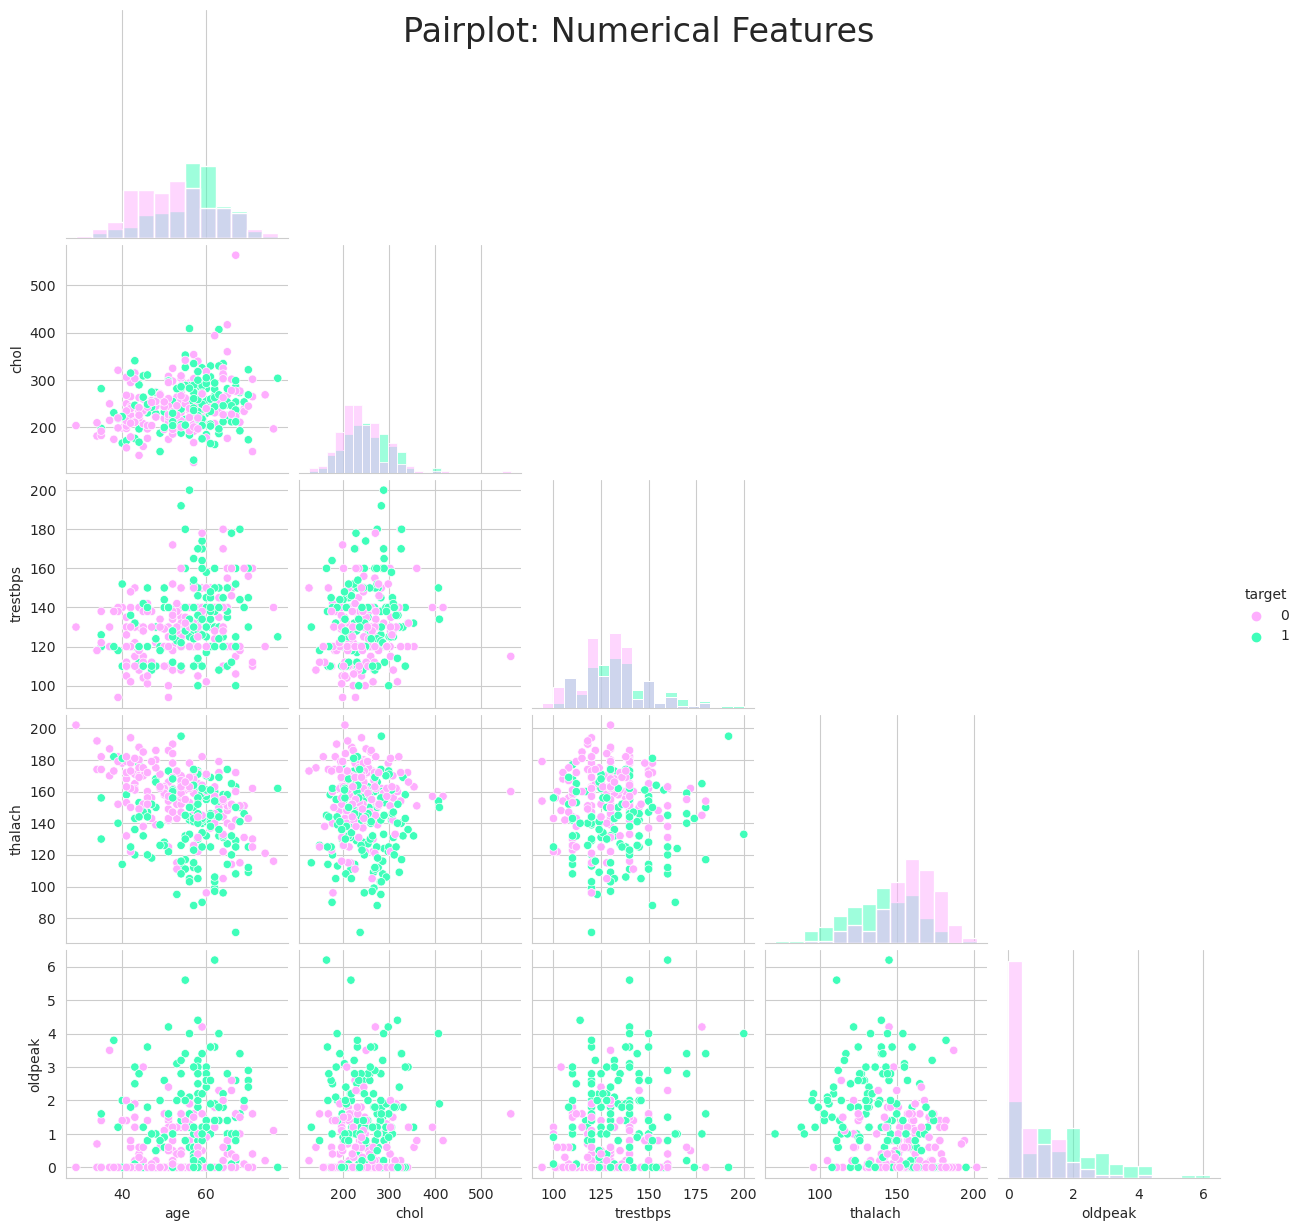

In [75]:
_ = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'target']
data_ = data[_]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24)

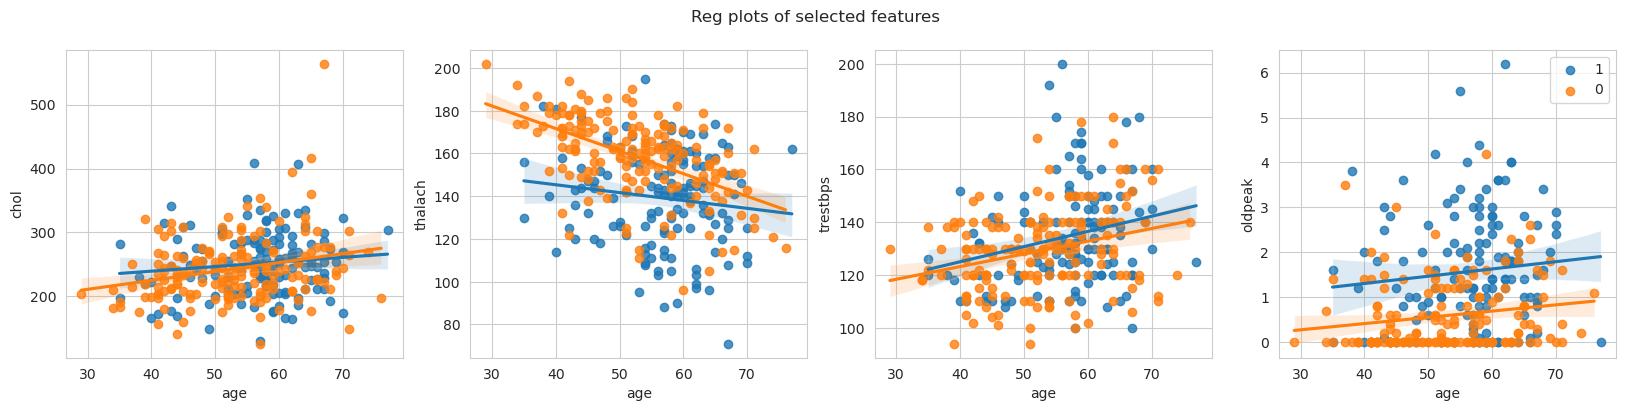

In [76]:
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sns.regplot(data=data[data['target'] ==1], x='age', y='chol', ax = ax[0], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='chol', ax = ax[0],  label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='thalach', ax = ax[1], label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='thalach', ax = ax[1],  label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='trestbps', ax = ax[2],  label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='trestbps', ax = ax[2],  label='0')
sns.regplot(data=data[data['target'] ==1], x='age', y='oldpeak', ax = ax[3],  label='1')
sns.regplot(data=data[data['target'] ==0], x='age', y='oldpeak', ax = ax[3],  label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

In [77]:
num_feats = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'ca']
df_ = data[num_feats]
corr = df_.corr( numeric_only = True, method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette( as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Numerical features correlation (Pearson's)", fontsize=20, y= 1.05);

KeyError: "['ca'] not in index"

In [ ]:
data = pd.get_dummies(data, columns=data.columns[mas][:-1], drop_first=False)

In [78]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((242, 28), (61, 28))

In [79]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[31  4]
 [ 6 20]]


Accuracy of Logistic Regression: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        35
           1       0.83      0.77      0.80        26

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [80]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[32  3]
 [ 8 18]]


Accuracy of Naive Bayes model: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        35
           1       0.86      0.69      0.77        26

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [81]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[29  6]
 [ 9 17]]


Accuracy of Random Forest: 75.40983606557377 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.74      0.65      0.69        26

    accuracy                           0.75        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.75      0.75        61



In [82]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[30  5]
 [ 9 17]]


Accuracy of Extreme Gradient Boost: 77.04918032786885 

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.77      0.65      0.71        26

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [83]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[29  6]
 [ 9 17]]


Accuracy of K-NeighborsClassifier: 75.40983606557377 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.74      0.65      0.69        26

    accuracy                           0.75        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.75      0.75        61



In [84]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[27  8]
 [ 9 17]]


Accuracy of DecisionTreeClassifier: 72.1311475409836 

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.68      0.65      0.67        26

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



In [85]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[31  4]
 [ 7 19]]


Accuracy of Support Vector Classifier: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.83      0.73      0.78        26

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



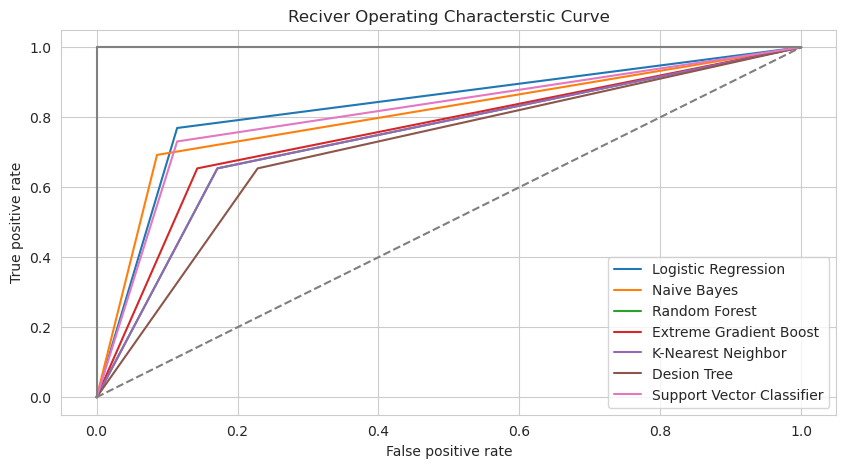

In [86]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [87]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 
                         'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,
                                      svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,83.606557
1,Naive Bayes,81.967213
2,Random Forest,75.409836
3,Extreme Gradient Boost,77.049180
4,K-Nearest Neighbour,75.409836
5,Decision Tree,72.131148
6,Support Vector Machine,81.967213


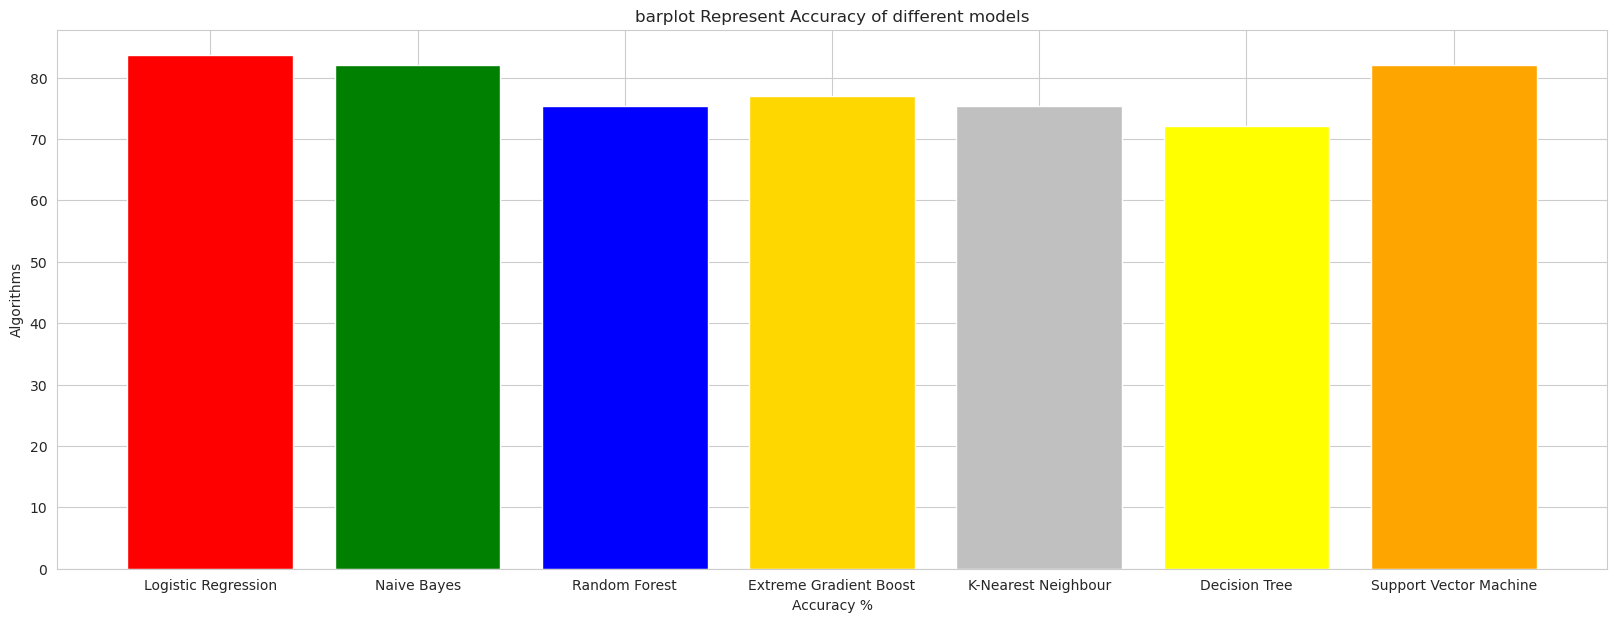

In [88]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(20,7))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [89]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[29  6]
 [ 9 17]]


Accuracy of StackingCVClassifier: 75.40983606557377 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.74      0.65      0.69        26

    accuracy                           0.75        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.75      0.75        61



In [90]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(random_state=42)

In [91]:
lin_clf = LinearSVC(max_iter=1_000_000, random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(max_iter=1000000, random_state=42)

In [92]:
cross_val_score(lin_clf, X_train, y_train).mean()

0.8350340136054422

In [93]:
lin_clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=42))
lin_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [198]:
cross_val_score(lin_clf, X_train, y_train).mean()

/home/cmos/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/cmos/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/cmos/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8350340136054422

In [199]:
svm_clf = make_pipeline(StandardScaler(), SVC(random_state=42))
cross_val_score(svm_clf, X_train, y_train).mean()

0.826530612244898

In [200]:
param_distrib = {
    "svc__gamma": reciprocal(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=8.712703466859457, gamma=0.001406336677771817,
                     random_state=42))])

In [202]:
rnd_search_cv.best_score_

0.8555272108843537

In [203]:
rnd_search_cv.score(X_test, y_test)

0.819672131147541

In [205]:
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_conf_matrix

array([[29,  6],
       [ 9, 17]])

In [208]:
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_acc_score

0.7540983606557377

In [100]:
param_distrib = {
    "svc__gamma": reciprocal(0.00001, 0.001),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=8.068573438476172, gamma=0.00028708753481954667,
                     random_state=42))])

In [101]:
rnd_search_cv.best_score_

0.8511904761904763

In [102]:
rnd_search_cv.score(X_test, y_test)

0.8032786885245902

In [103]:
param_distrib = {
    "svc__gamma": reciprocal(1, 10),
    "svc__C": uniform(1, 100)
}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distrib, n_iter=100, cv=50,
                                   random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=60.24145688620425, gamma=1.1128853174905728,
                     random_state=42))])

In [104]:
rnd_search_cv.best_score_

0.5640000000000001

In [105]:
rnd_search_cv.score(X_test, y_test)

0.6229508196721312

In [ ]:
from sklearn import preprocessing

In [110]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=1000,kernel='rbf',degree=10,gamma=10))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.5737704918032787

In [111]:

svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=5,kernel='poly',degree=2,gamma=0.01))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.7213114754098361

In [112]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=1000,kernel='poly',degree=10,gamma=10))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.639344262295082

In [113]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=5,kernel='linear',degree=2,gamma=0.01))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.7704918032786885

In [114]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=1000,kernel='linear',degree=1,gamma=0.0001))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.7704918032786885

In [195]:
svc_svm = make_pipeline(preprocessing.StandardScaler(),SVC(C=50,kernel='poly',degree=1,gamma=0.000056))
svc_svm.fit(X_train, y_train)
accuracy_score(y_test,svc_svm.predict(X_test))

0.819672131147541

In [209]:
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 83.60655737704919 



In [211]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_conf_matrix

array([[31,  4],
       [ 6, 20]])

In [214]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_predict).ravel()
tn, fp, fn, tp 

(31, 4, 6, 20)

به نطر من بهترین مدل برای این داده ها لاجستیک رگرسیون بود 
چون هم دقتش بالاتر بود 
هم خطای نوع اول و دومش هم از همه کمتر بود 


برای تشخیص پزشکی به نظر من

FN

مهمه 

به شرط اینکه بعد این جواب ازمایشات دقیقتر انجام بشه
اگر بعد اینا ازمایشات دقیق تر انجام بشه تشخیص یه بیمار سالم به اشتباه ناسالم  خطای نوع اول هست و قابل جبران هست

اما اگر بهش دارویی چیزی تزریق بشه که اونوقت شرایط فرق میکنه و خطای نوع اول هم مهم میشه

اما در هر شرایط کسی که بیمار هست و به اشتباه سالم تشخیص داده بشه میتونه خیلی بد باشه و باید مدلی انتخاب بشه که بتونه کمترین خطای نوع دوم رو داشته باشه

استاد من میخواستم با کراس ول بهتر کار کنم
اما استاد دیویند توی گیت کد هاروبارگذاری نکردن
و اونجوری میخواستم نشد که مدل اس وی ام رو بزنم